In [1]:
import json, urllib
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
# Define channel gene names

channel_index_genes = [    'CENT2',
    'TUBA1B',
    'PXN',
    'TJP1',
    'LMNB1',
    'NUP153',
    'ST6GAL1',
    'LAMP1',
    'ACTB',
    'DSP',
    'FBL',
    'NPM1',
    'TOMM20',
    'PMP34',
    'ACTN1',
    'GJA1',
    'H2B',
    'SON',
    'SEC61B',
    'RAB5A',
    'MYH10',
    'AAVS1',
    'CTNNB1',
    'ATP2A2',
    'SMC1A',
    'CELL+NUCLEUS']

channel_index_names = ['Centrioles',
    'Microtubules',
    'Matrix adhesions',
    'Tight junctions',
    'Nuclear envelope',
    'Nuclear pores',
    'Golgi',
    'Lysosome',
    'Filamentous actin',
    'Desmosomes',
    'Nucleolus (Dense Fibrillar Component)',
    'Nucleolus (Granular Component)',
    'Mitochondria',
    'Peroxisomes',
    'Actin filaments',
    'Gap junctions',
    'Histone',
    'Nuclear Speckles',
    'Endoplasmic Reticulum',
    'Endosomes',
    'Actomyosin bundles',
    'Plasma membrane',
    'Adherens junctions',
    'Sarcoplasmic reticulum',
    'Cohesin',
    'CELL+NUCLEUS']

In [214]:
# df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_afterfix.csv')

# Final 9 bins morphed dataset
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC2_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC3_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC4_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC5_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC6_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC7_9bins.csv")

# df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins.csv')
#df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins_90percentcells.csv')
# df_final = pd.read_csv("PC1_bin0_50C2morphedcells.csv")
df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/cvapipe_analysis/local_staging/multiresstructcompare/pairwise_metrics/multires_pairwise_similarity.csv')

In [215]:
df_final

,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers)
0,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,468479,470631,0.485669,0.29
1,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,468479,470631,0.578703,0.58
2,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,468479,470631,0.670259,1.16
3,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,468479,470631,0.768958,2.32
4,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,468479,470631,0.868834,4.64
...,...,...,...,...,...,...,...,...,...,...
274738,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,910624,982008,0.758372,4.64
274739,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,910624,982008,0.838956,9.28
274740,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,910624,982008,0.968012,18.56
274741,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,5.0,5.0,910624,982008,0.999747,37.12


In [216]:
# df_final_2 = pd.DataFrame()
# from tqdm import tqdm

    
# with tqdm(
#     total=len(df_final.groupby(by = ['structure_name_1', 'structure_name_2', 'bin_1', 'Resolution (micrometers)']))
#         ) as pbar:
#     for name, group in df_final.groupby(by = ['structure_name_1', 'structure_name_2', 'bin_1', 'Resolution (micrometers)']):
#         group.reset_index(inplace=True)
#         group = group.drop(columns = "index")
#         group['samples'] = group.index
#         df_final_2 = df_final_2.append(group)
#         pbar.update(1)

100%|██████████| 225/225 [00:02<00:00, 112.06it/s]


In [217]:
# df_final_2.to_csv("PC1_bin0_50C2morphedcells.csv")


# Check number of morphed cells

In [39]:
df_all = pd.DataFrame()

for i in range(2, 50):
#     df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALraw_morphed_PC1_9bins.csv")
#     df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins_90percentcells.csv')
    df_final = pd.read_csv("PC1_bin0_50C2morphedcells.csv")

    inc_res = [  0.29,  0.58,  1.16,  2.32,  4.64,  9.28, 18.56, 37.12]
    Morph_res = [0.11, 0.22, 0.43, 0.86, 1.73, 3.46, 6.91, 13.82]
    mapping = {i:j for i, j in zip(inc_res, Morph_res)}


    df_final.replace({"Resolution (micrometers)": mapping}, inplace=True)

    old_bin = [  1., 2., 3., 4., 5., 6., 7., 8., 9.]
    new_bin = [-4,-3,-2,-1,0,1,2,3,4]
    mapping = {i:j for i, j in zip(old_bin, new_bin)}


    df_final.replace({"bin_1": mapping}, inplace=True)
    df_final.replace({"bin_2": mapping}, inplace=True)
    
    bins = [0]
    res = [0.11]


    df_final = df_final.loc[df_final['bin_1'].isin(bins)]
    df_final = df_final.loc[df_final['Resolution (micrometers)'].isin(res)]
    
    sub_sampled_df = pd.DataFrame()
    
    all_max = []
    for index, group in df_final.groupby(['structure_name_1', 'bin_1', 'Resolution (micrometers)']):
        all_max.append(group['samples'].max())
    
    if min(all_max) < i:
        break
    
    for count in range(1):
        for index, group in df_final.groupby(['structure_name_1', 'bin_1', 'Resolution (micrometers)']):
            this_df = group.sample(n=i)
            this_df['iteration'] = count
            sub_sampled_df = sub_sampled_df.append(this_df)
    sub_sampled_df = sub_sampled_df.groupby(['structure_name_1', 'structure_name_2', 'bin_1','Resolution (micrometers)' ]).mean()["Pearson Correlation"].reset_index()

    #groups = ["FBL", "NPM1", "H2B","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","PMP34", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CENT2", "PXN"]
    groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]

    #groups = ["FBL", "NPM1", "LMNB1", "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1", "ACTN1", "MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]
    df_morph = sub_sampled_df.loc[sub_sampled_df['structure_name_1'] == sub_sampled_df['structure_name_2']]

    print(df_morph.shape, i)

    df_morph = df_morph.groupby(['structure_name_1', 'structure_name_2']).mean()["Pearson Correlation"].reset_index()

    df_morph['NumSamples'] = i 

    df_all = df_all.append(df_morph)
    
    

(25, 5) 2
(25, 5) 3
(25, 5) 4
(25, 5) 5
(25, 5) 6
(25, 5) 7
(25, 5) 8
(25, 5) 9
(25, 5) 10
(25, 5) 11
(25, 5) 12
(25, 5) 13
(25, 5) 14
(25, 5) 15
(25, 5) 16
(25, 5) 17
(25, 5) 18
(25, 5) 19
(25, 5) 20
(25, 5) 21
(25, 5) 22
(25, 5) 23
(25, 5) 24
(25, 5) 25
(25, 5) 26
(25, 5) 27
(25, 5) 28
(25, 5) 29
(25, 5) 30
(25, 5) 31
(25, 5) 32
(25, 5) 33
(25, 5) 34
(25, 5) 35
(25, 5) 36
(25, 5) 37
(25, 5) 38
(25, 5) 39
(25, 5) 40
(25, 5) 41
(25, 5) 42
(25, 5) 43
(25, 5) 44
(25, 5) 45
(25, 5) 46
(25, 5) 47
(25, 5) 48
(25, 5) 49


In [40]:
df_all


,structure_name_1,structure_name_2,Pearson Correlation,NumSamples
0,AAVS1,AAVS1,0.394455,2
1,ACTB,ACTB,0.603438,2
2,ACTN1,ACTN1,0.464294,2
3,ATP2A2,ATP2A2,0.462105,2
4,CETN2,CETN2,0.234389,2
...,...,...,...,...
20,SON,SON,0.331885,49
21,ST6GAL1,ST6GAL1,0.165728,49
22,TJP1,TJP1,0.191875,49
23,TOMM20,TOMM20,0.220826,49


In [41]:
df_morph

,structure_name_1,structure_name_2,Pearson Correlation,NumSamples
0,AAVS1,AAVS1,0.458415,49
1,ACTB,ACTB,0.532117,49
2,ACTN1,ACTN1,0.426018,49
3,ATP2A2,ATP2A2,0.445051,49
4,CETN2,CETN2,0.238532,49
5,CTNNB1,CTNNB1,0.414540,49
6,DSP,DSP,0.243537,49
7,FBL,FBL,0.427405,49
8,GJA1,GJA1,0.158554,49
9,HIST1H2BJ,HIST1H2BJ,0.747493,49


In [42]:
df_all

,structure_name_1,structure_name_2,Pearson Correlation,NumSamples
0,AAVS1,AAVS1,0.394455,2
1,ACTB,ACTB,0.603438,2
2,ACTN1,ACTN1,0.464294,2
3,ATP2A2,ATP2A2,0.462105,2
4,CETN2,CETN2,0.234389,2
...,...,...,...,...
20,SON,SON,0.331885,49
21,ST6GAL1,ST6GAL1,0.165728,49
22,TJP1,TJP1,0.191875,49
23,TOMM20,TOMM20,0.220826,49


In [72]:
# df_all_100counts = df_all.copy()

In [43]:
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]

df_total = pd.DataFrame()
for g in groups:
    df_morph2 = df_all.loc[df_all['structure_name_1'] == g]
    df_morph2 = df_morph2.sort_values(by=['Pearson Correlation'], ascending=False)
    df_total = df_total.append(df_morph2)
    
df_total.reset_index(inplace=True, drop=True)

In [44]:
#structs = ['FBL', 'NPM1', 'SON', 'SMC1A', 'HIST1H2BJ', 'LMNB1', 'NUP153']
# structs = []
#structs = ['SEC61B', "ATP2A2", "TOMM20", "PMP34", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B"]
structs = ['AAVS1', "ACTB", "ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "CETN2", "PXN"]
df_sub = df_total[df_total['structure_name_1'].isin(structs)]

In [45]:
df_sub

,structure_name_1,structure_name_2,Pearson Correlation,NumSamples
672,CETN2,CETN2,0.256472,4
673,CETN2,CETN2,0.250930,11
674,CETN2,CETN2,0.244552,3
675,CETN2,CETN2,0.243664,46
676,CETN2,CETN2,0.243401,29
...,...,...,...,...
1195,PXN,PXN,0.325502,24
1196,PXN,PXN,0.323795,32
1197,PXN,PXN,0.322657,3
1198,PXN,PXN,0.320996,36


In [46]:
colors = ['#A9D1E5', '#88D1E5', '#3292C9', '#306598', '#305098', '#084AE7', '#0840E7', '#FFFFB5', '#FFFFA0','#FFD184',
'#FFD16E',
'#FFD150',
'#AD952A',
'#B7952A',
'#9D7000',
'#6B4500',
'#FFD2FF',
'#FFB1FF',
'#FF96FF',
'#FF82FF',
'#CB1CCC',
'#A850C0',
'#A850D4',
'#A850E8',
'#77207C']

color_dict = {i:j for i, j in zip(groups, colors)}


In [47]:
color_dict

{'FBL': '#A9D1E5',
 'NPM1': '#88D1E5',
 'SON': '#3292C9',
 'SMC1A': '#306598',
 'HIST1H2BJ': '#305098',
 'LMNB1': '#084AE7',
 'NUP153': '#0840E7',
 'SEC61B': '#FFFFB5',
 'ATP2A2': '#FFFFA0',
 'TOMM20': '#FFD184',
 'SLC25A17': '#FFD16E',
 'RAB5A': '#FFD150',
 'LAMP1': '#AD952A',
 'ST6GAL1': '#B7952A',
 'CETN2': '#9D7000',
 'TUBA1B': '#6B4500',
 'AAVS1': '#FFD2FF',
 'ACTN1': '#FFB1FF',
 'ACTB': '#FF96FF',
 'MYH10': '#FF82FF',
 'CTNNB1': '#CB1CCC',
 'GJA1': '#A850C0',
 'TJP1': '#A850D4',
 'DSP': '#A850E8',
 'PXN': '#77207C'}

In [48]:
3%3

0

In [78]:
df_subtotal = df_total.loc[df_total['NumSamples'] % 4 == 0]

df_subtotal2 = df_total.loc[df_total['NumSamples'] < 20]

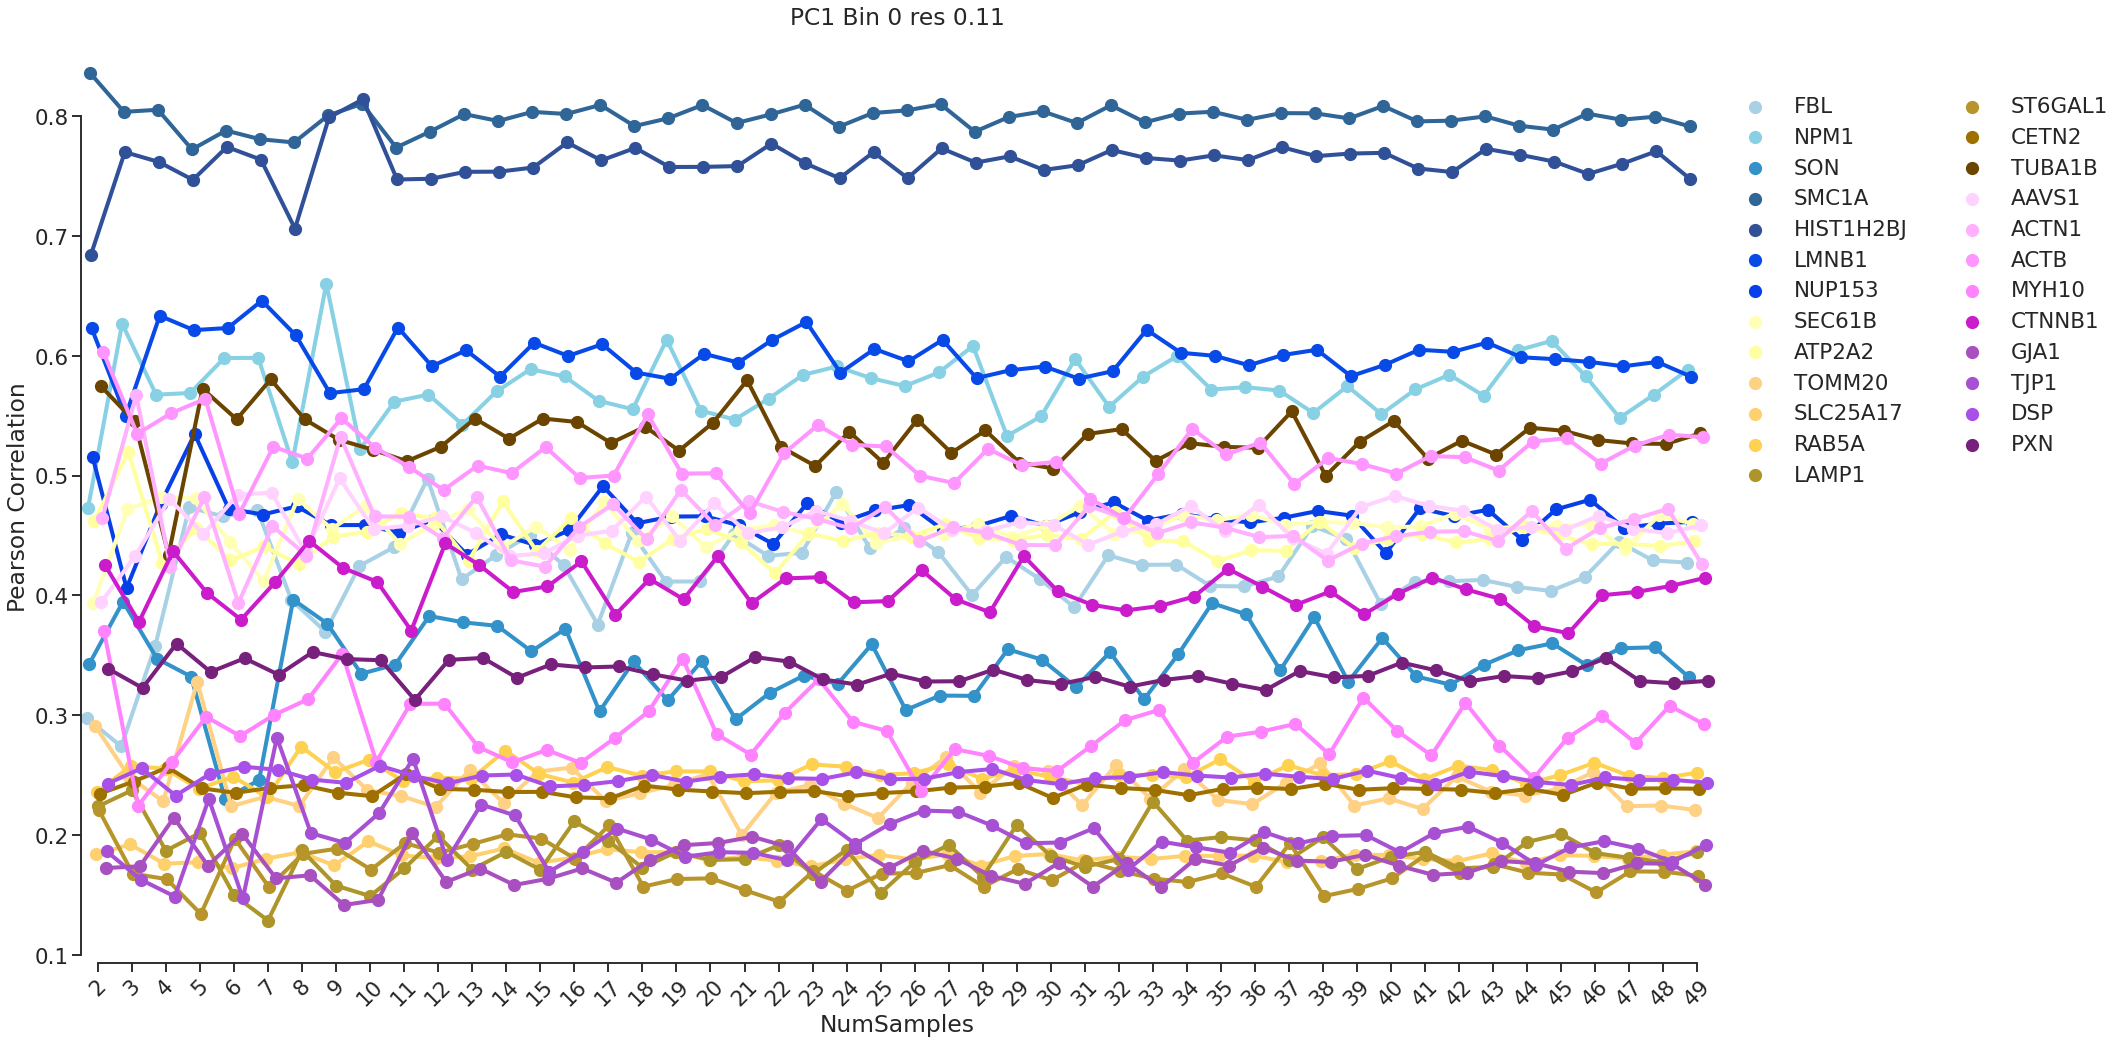

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk', font_scale=1.3)
fig, ax = plt.subplots(figsize = (30,15))

plt.rcParams['svg.fonttype'] = 'none'
# sns.lineplot(ax=ax, data= df_all, x = "NumSamples", y = "Pearson Correlation", hue = "structure_name_1")
# cluster_labels = [0,0,1,2,2,3,3,4,4,5,5,6,7,7,8,9,10,10,10,11,12,13,14,14,15]

# prepared_clustering = pd.Series(index=groups, data=cluster_labels)
# cl_labels = [0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14, 15]
# colors = dict(zip(cl_labels,sns.color_palette("Set3",  n_colors =16)))
# row_colors = prepared_clustering.map(colors)

# colors = dict(zip(cl_labels,sns.color_palette("Set3", len(cl_labels))))
ax = sns.pointplot(
    x="NumSamples",
    y="Pearson Correlation",
    hue="structure_name_1",
    data=df_total,
    ci=95,
    dodge = True,
#     capsize=0.2,
    palette=color_dict,
#     markers = markers,
#     linestyles=linestyles,
)
# ax.legend(
#     loc="best", bbox_to_anchor=(0.95, 0.95), ncol=2, frameon=False,
# )


ax.legend(
    loc="best", bbox_to_anchor=(1, 0.95), ncol=2, frameon=False,
)
# ax.set_title(f"Bin {this_bin}")
ax.set_title(f"PC1 Bin 0 res 0.11")


sns.despine(
    offset=0, trim=True,
)

plt.xticks(rotation=45)

plt.tight_layout()

# fig.savefig(
#     f"./stereotypy_samplesize_50_seg_all_90percentcells.svg", format="svg", dpi=300, transparent=False,
# )

# Normal stereotypy code

In [420]:
df_final['samples'].max()

50

In [218]:
# df_final = pd.read_csv('/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_afterfix.csv')

# Final 9 bins morphed dataset
df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC2_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC3_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC4_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC5_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC6_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC7_9bins.csv")

df_final = pd.read_csv("PC1_bin0_50C2morphedcells.csv")

In [219]:
inc_res = [  0.29,  0.58,  1.16,  2.32,  4.64,  9.28, 18.56, 37.12]
Morph_res = [0.11, 0.22, 0.43, 0.86, 1.73, 3.46, 6.91, 13.82]
mapping = {i:j for i, j in zip(inc_res, Morph_res)}


df_final.replace({"Resolution (micrometers)": mapping}, inplace=True)

old_bin = [  1., 2., 3., 4., 5., 6., 7., 8., 9.]
new_bin = [-4,-3,-2,-1,0,1,2,3,4]
mapping = {i:j for i, j in zip(old_bin, new_bin)}


df_final.replace({"bin_1": mapping}, inplace=True)
df_final.replace({"bin_2": mapping}, inplace=True)



In [220]:
df_final['structure_name_1'].unique()

array(['AAVS1', 'ACTB', 'ACTN1', 'ATP2A2', 'CETN2', 'CTNNB1', 'DSP',
       'FBL', 'GJA1', 'HIST1H2BJ', 'LAMP1', 'LMNB1', 'MYH10', 'NPM1',
       'NUP153', 'PXN', 'RAB5A', 'SEC61B', 'SLC25A17', 'SMC1A', 'SON',
       'ST6GAL1', 'TJP1', 'TOMM20', 'TUBA1B'], dtype=object)

In [221]:
df_final['bin_1'].unique()

array([0.])

In [222]:
# df_order = pd.DataFrame()
# for name, group in df.groupby("GeneratedStructureName_i"):
#     group1 = group.iloc[18:21]
# #     group2 = group.iloc[8:10]
#     group2 = group.iloc[58:60]
#     group3 = group.iloc[31:34]
#     df_order = df_order.append(group1)
#     df_order = df_order.append(group2)
#     df_order = df_order.append(group3)

In [223]:
# group3

In [224]:
# df_order.iloc[0]['GeneratedStructureInstance_i']

In [225]:
# df_neworder = pd.DataFrame()
# from tqdm import tqdm

    
# with tqdm(
#     total=len(df_order.groupby(by = ['GeneratedStructureName_i']))
#         ) as pbar:
#     for name, group in df_order.groupby(by = ['GeneratedStructureName_i']):
#         group.reset_index(inplace=True)
#         group = group.drop(columns = "index")
#         group['GeneratedStructureInstance_i'] = group.index + 1
#         df_neworder = df_neworder.append(group)
#         pbar.update(1)

In [226]:
# df_neworder.reset_index(inplace=True, drop=True)

In [227]:
# df_neworder = df_neworder.drop(columns = ['Unnamed: 0'])

In [228]:
# df_neworder

In [229]:
# df_neworder = df_neworder.groupby("GeneratedStructureName_i").head(9)

In [230]:
# df_neworder.to_csv("/allen/aics/modeling/ritvik/projects/cvapipe/local_staging/generategfpinstantiations/images_CellID_86655/manifest_short.csv")

In [231]:
df_final['Resolution (micrometers)'].unique()

array([ 0.11,  0.22,  0.43,  0.86,  1.73,  3.46,  6.91, 13.82, 74.24])

In [232]:
#groups = ["FBL", "NPM1", "H2B","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","PMP34", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CENT2", "PXN"]
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]

#groups = ["FBL", "NPM1", "LMNB1", "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1", "ACTN1", "MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]
df_morph = df_final.loc[df_final['structure_name_1'] == df_final['structure_name_2']]

bins = [0]
res = [0.11]


df_morph = df_morph.loc[df_morph['bin_1'].isin(bins)]
df_morph = df_morph.loc[df_morph['Resolution (micrometers)'].isin(res)]

df_morph = df_morph.groupby(['structure_name_1', 'structure_name_2', 'samples']).mean()["Pearson Correlation"].reset_index()

In [233]:
df_morph

,structure_name_1,structure_name_2,samples,Pearson Correlation
0,AAVS1,AAVS1,0,0.485669
1,AAVS1,AAVS1,1,0.395966
2,AAVS1,AAVS1,2,0.336524
3,AAVS1,AAVS1,3,0.418008
4,AAVS1,AAVS1,4,0.355775
...,...,...,...,...
30522,TUBA1B,TUBA1B,1220,0.170117
30523,TUBA1B,TUBA1B,1221,0.165522
30524,TUBA1B,TUBA1B,1222,0.193294
30525,TUBA1B,TUBA1B,1223,0.173418


In [234]:
grouped = df_morph.groupby(['structure_name_1'])
df_total = pd.DataFrame()
count  = 0

rs = {"group": [], 'avg_r': []}
for name, group in grouped:
    rs['group'].append(name)
    rs['avg_r'].append(group.mean()['Pearson Correlation'])
    
rs = pd.DataFrame(rs)
rs = rs.sort_values(['avg_r']).reset_index(drop=True)

rs["group"].values[::-1]

array(['LMNB1', 'AAVS1', 'NPM1', 'FBL', 'SEC61B', 'ATP2A2', 'HIST1H2BJ',
       'TUBA1B', 'NUP153', 'TOMM20', 'CTNNB1', 'SON', 'LAMP1', 'ACTB',
       'ST6GAL1', 'MYH10', 'ACTN1', 'TJP1', 'GJA1', 'SLC25A17', 'RAB5A',
       'SMC1A', 'PXN', 'DSP', 'CETN2'], dtype=object)

In [235]:
rs = pd.DataFrame(rs)
rs = rs.sort_values(['avg_r']).reset_index(drop=True)

In [236]:
rs["group"].values[::-1]

array(['LMNB1', 'AAVS1', 'NPM1', 'FBL', 'SEC61B', 'ATP2A2', 'HIST1H2BJ',
       'TUBA1B', 'NUP153', 'TOMM20', 'CTNNB1', 'SON', 'LAMP1', 'ACTB',
       'ST6GAL1', 'MYH10', 'ACTN1', 'TJP1', 'GJA1', 'SLC25A17', 'RAB5A',
       'SMC1A', 'PXN', 'DSP', 'CETN2'], dtype=object)

In [237]:
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]

df_total = pd.DataFrame()
for g in rs["group"].values[::-1]:
    df_morph2 = df_morph.loc[df_morph['structure_name_1'] == g]
    df_morph2 = df_morph2.sort_values(by=['Pearson Correlation'], ascending=False)
    df_total = df_total.append(df_morph2)
    
df_total.reset_index(inplace=True, drop=True)

# df_total['Pearson Correlation'] = df_total['Pearson Correlation'].apply(lambda x:round(x,3))

In [238]:
df_total

,structure_name_1,structure_name_2,samples,Pearson Correlation
0,LMNB1,LMNB1,1063,0.653459
1,LMNB1,LMNB1,120,0.646640
2,LMNB1,LMNB1,102,0.639336
3,LMNB1,LMNB1,381,0.638658
4,LMNB1,LMNB1,1214,0.636768
...,...,...,...,...
30522,CETN2,CETN2,284,-0.000109
30523,CETN2,CETN2,280,-0.000111
30524,CETN2,CETN2,303,-0.000117
30525,CETN2,CETN2,301,-0.000120


In [239]:

# # srructs = ['CTNNB1', 'CETN2', 'LMNB1']
# structs = ['FBL', 'NPM1', 'SON', 'SMC1A', 'HIST1H2BJ']
# # structs = ['LMNB1', 'NUP153']
# # structs = ['SEC61B', "ATP2A2", "TOMM20", "PMP34", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B"]
# # structs = ['AAVS1', "ACTB", "ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "CETN2", "PXN"]
# df_total = df_total[df_total['structure_name_1'].isin(structs)]

In [240]:
df_total

,structure_name_1,structure_name_2,samples,Pearson Correlation
0,LMNB1,LMNB1,1063,0.653459
1,LMNB1,LMNB1,120,0.646640
2,LMNB1,LMNB1,102,0.639336
3,LMNB1,LMNB1,381,0.638658
4,LMNB1,LMNB1,1214,0.636768
...,...,...,...,...
30522,CETN2,CETN2,284,-0.000109
30523,CETN2,CETN2,280,-0.000111
30524,CETN2,CETN2,303,-0.000117
30525,CETN2,CETN2,301,-0.000120


In [241]:
#groups = ["FBL", "NPM1", "HIST1H2BJ","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]

#groups = ["FBL", "NPM1", "H2B", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

# groups = ["FBL", "NPM1", "H2B","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

colors = 2 * [(0.9, 0.14799999999999996, 0.09999999999999998)] + 1*[(0.9, 0.46799999999999997, 0.09999999999999998)]+ 2 * [(0.9, 0.788, 0.09999999999999998)] +2*[(0.6919999999999998, 0.9, 0.09999999999999998)] + 4*[(0.3719999999999999, 0.9, 0.09999999999999998)] + 1*[(0.09999999999999998, 0.9, 0.14800000000000002)] +2* [(0.09999999999999998, 0.9, 0.46800000000000025)] + 1*[(0.09999999999999998, 0.9, 0.7880000000000001)] + 1* [(0.09999999999999998, 0.6919999999999998, 0.9)]+ 3*[(0.09999999999999998, 0.3719999999999999, 0.9)] + 1*[(0.14800000000000002, 0.09999999999999998, 0.9)] + 1 *[(0.46799999999999997, 0.09999999999999998, 0.9)] + 1* [(0.7879999999999999, 0.09999999999999998, 0.9)] + 2*[(0.9, 0.09999999999999998, 0.6919999999999993)] + 1*[(0.9, 0.09999999999999998, 0.37199999999999933)] 
#colors = 5 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 7 * ['r'] + 2 * ['y'] 
#colors = 3 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 8 * ['r'] + 2 * ['y'] 
# markers = 12 * ["x"] + 12 * ["o"] + 2*[">"]
markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
linestyles= 24 * [":"]
kim_colors = ['#A9D1E5', '#88D1E5', '#3292C9','#306598','#305098', '#084AE7','#0840E7', '#FFFFB5','#FFFFA0','#FFD184','#FFD16E','#FFD150','#AD952A','#B7952A','#9D7000','#6B4500','#FFD2FF','#FFB1FF','#FF96FF','#FF82FF','#CB1CCC',
         '#A850C0','#A850D4','#A850E8', '#77207C']
color_dict = {i:j for i, j in zip(groups, kim_colors)}

# colors = {0: (0.9, 0.14799999999999996, 0.09999999999999998),
#  1: (0.9, 0.46799999999999997, 0.09999999999999998),
#  2: (0.9, 0.788, 0.09999999999999998),
#  3: (0.6919999999999998, 0.9, 0.09999999999999998),
#  4: (0.3719999999999999, 0.9, 0.09999999999999998),
#  5: (0.09999999999999998, 0.9, 0.14800000000000002),
#  6: (0.09999999999999998, 0.9, 0.46800000000000025),
#  7: (0.09999999999999998, 0.9, 0.7880000000000001),
#  8: (0.09999999999999998, 0.6919999999999998, 0.9),
#  9: (0.09999999999999998, 0.3719999999999999, 0.9),
#  10: (0.14800000000000002, 0.09999999999999998, 0.9),
#  11: (0.46799999999999997, 0.09999999999999998, 0.9),
#  12: (0.7879999999999999, 0.09999999999999998, 0.9),
#  13: (0.9, 0.09999999999999998, 0.6919999999999993),
#  14: (0.9, 0.09999999999999998, 0.37199999999999933)}

In [242]:
color_dict

{'FBL': '#A9D1E5',
 'NPM1': '#88D1E5',
 'SON': '#3292C9',
 'SMC1A': '#306598',
 'HIST1H2BJ': '#305098',
 'LMNB1': '#084AE7',
 'NUP153': '#0840E7',
 'SEC61B': '#FFFFB5',
 'ATP2A2': '#FFFFA0',
 'TOMM20': '#FFD184',
 'SLC25A17': '#FFD16E',
 'RAB5A': '#FFD150',
 'LAMP1': '#AD952A',
 'ST6GAL1': '#B7952A',
 'CETN2': '#9D7000',
 'TUBA1B': '#6B4500',
 'AAVS1': '#FFD2FF',
 'ACTN1': '#FFB1FF',
 'ACTB': '#FF96FF',
 'MYH10': '#FF82FF',
 'CTNNB1': '#CB1CCC',
 'GJA1': '#A850C0',
 'TJP1': '#A850D4',
 'DSP': '#A850E8',
 'PXN': '#77207C'}

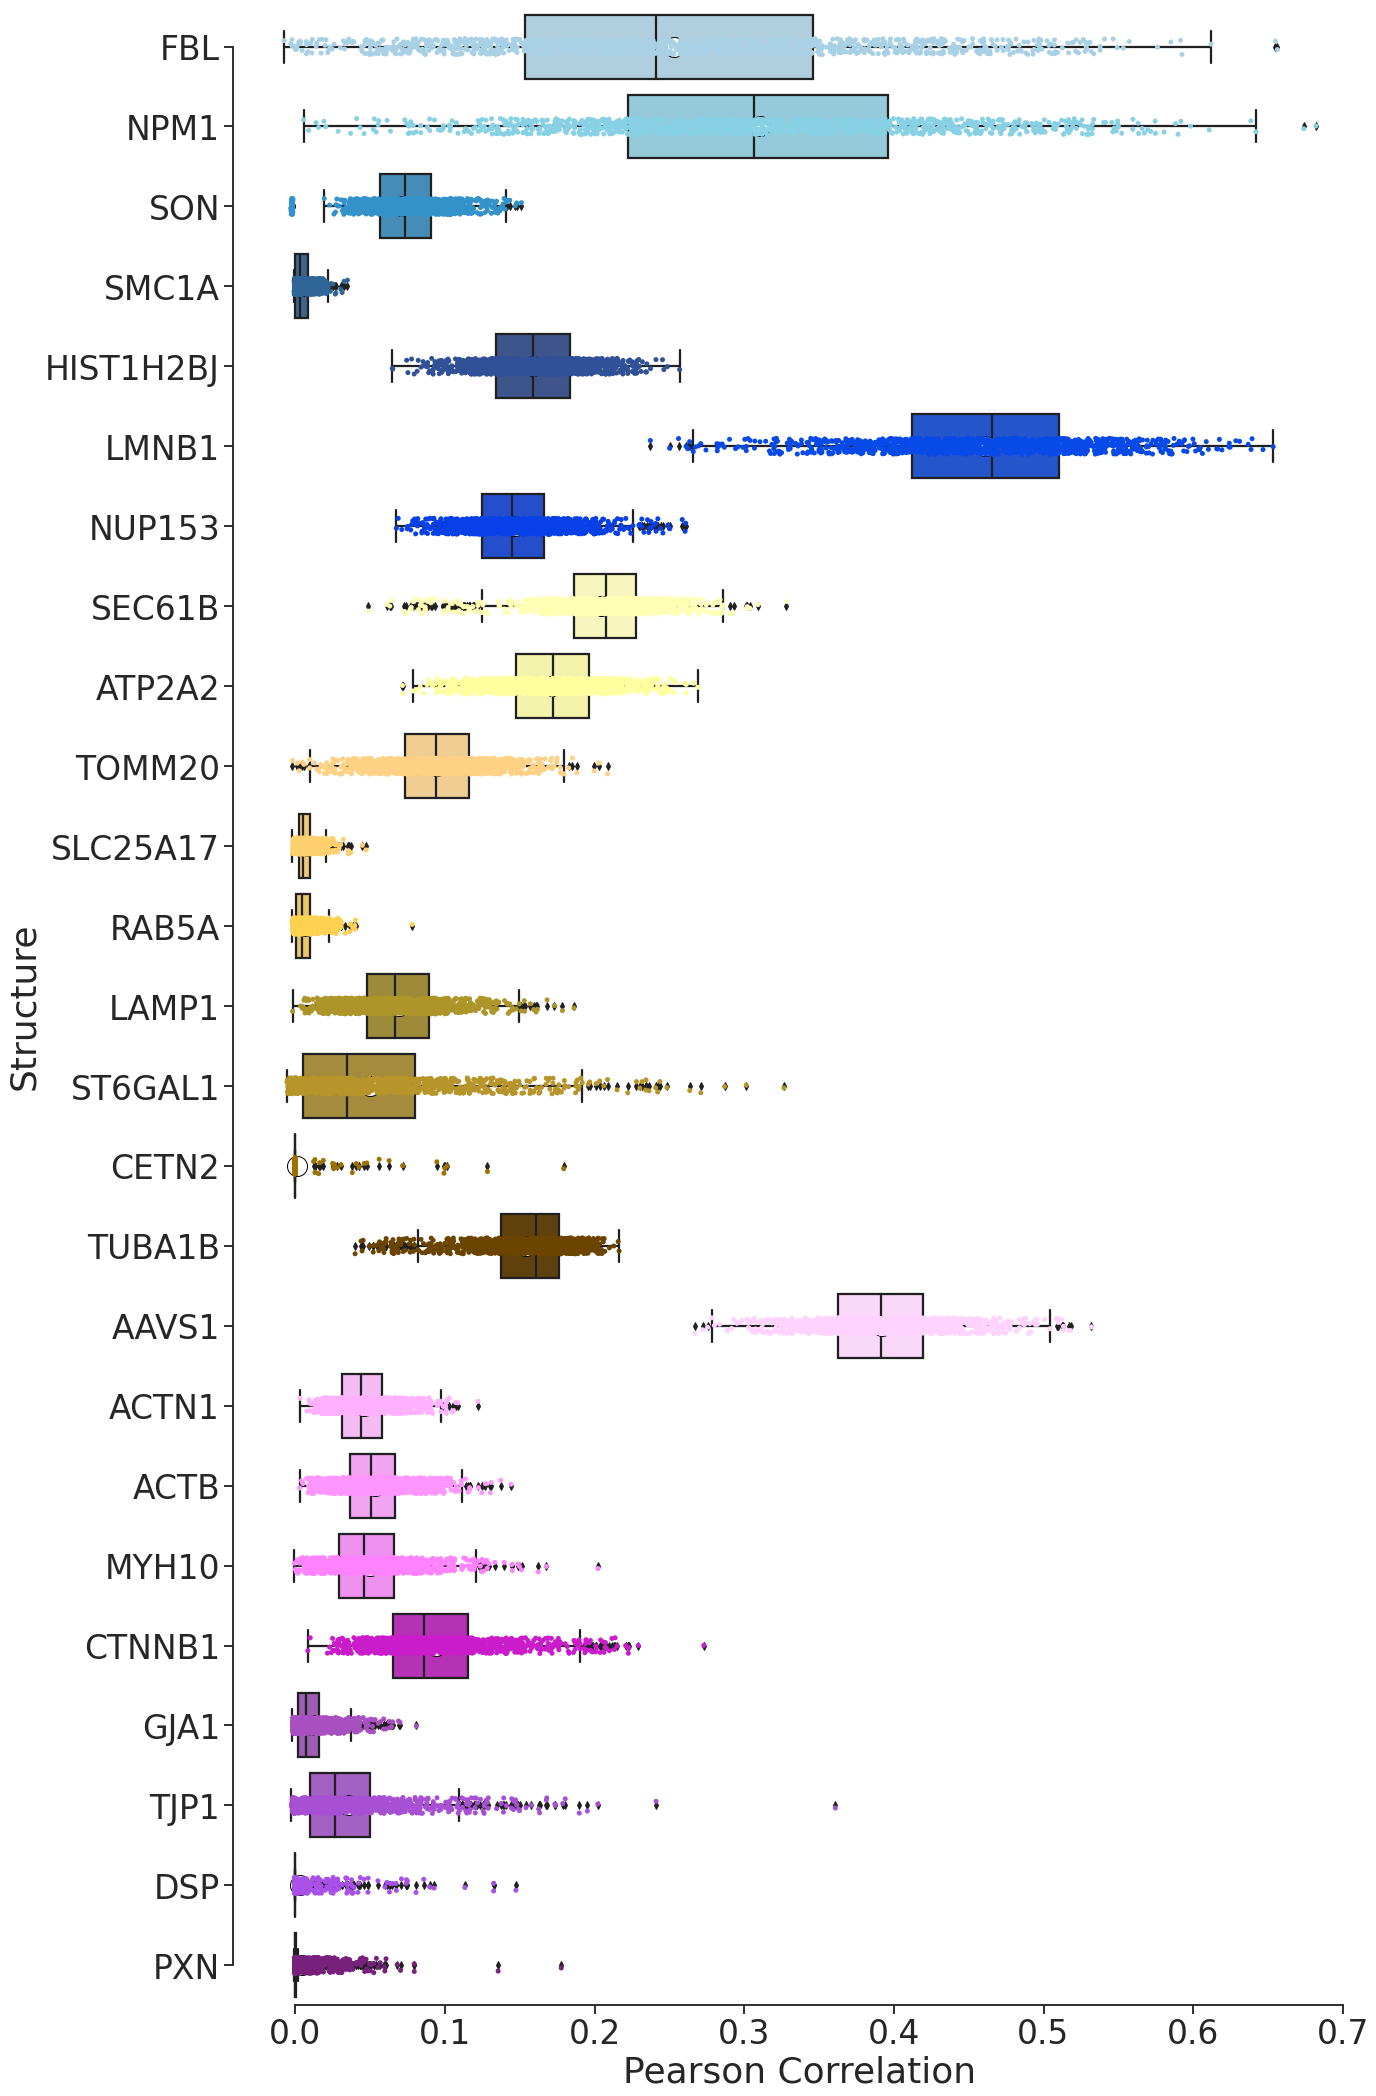

In [245]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
#sns.set_context('talk', font_scale=1.7)
sns.set_context('talk', font_scale=2)

fig, ax =  plt.subplots(1,1,figsize = (20,30))
# fig, ax =  plt.subplots(1,1,figsize = (40,10))
# Determine the order of boxes
# order = planets.groupby(by=["method"])["distance"].sum().iloc[::-1].index
# df_morph = df_morph.sort_values(by=['Pearson Correlation'])

plt.rcParams['svg.fonttype'] = 'none'
# sns.lineplot(ax=ax, data= df_all, x = "NumSamples", y = "Pearson Correlation", hue = "structure_name_1")
# cluster_labels = [0,0,1,2,2,3,3,4,4,5,5,6,7,7,8,9,10,10,10,11,12,13,14,14,15]

# prepared_clustering = pd.Series(index=groups, data=cluster_labels)
# cl_labels = [0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14, 15]
# colors = dict(zip(cl_labels,sns.color_palette("Set3",  n_colors =16)))
# row_colors = prepared_clustering.map(colors)
# Plot the orbital period with horizontal boxes

ax = sns.stripplot(x="Pearson Correlation", y="structure_name_1", order=groups, data=df_total,palette=color_dict,orient="h")
ax = sns.boxplot(x="Pearson Correlation", y="structure_name_1", order=groups, data=df_total,showmeans=True, palette=color_dict,orient="h", meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"20"})


# ax = sns.boxplot(x="StructureName_1", y="Pearson Correlation", data=df_morph,order=groups, palette=color_dict, orient="v")

# ax = sns.stripplot(x="StructureName_1", y="Pearson Correlation", data=df_morph, order=groups,palette=color_dict,orient="v")


ax.set_ylabel('Structure')
ax.set_xlabel('Pearson Correlation')
# ax.set_xlabel('Structure')
# ax.set_ylabel('Pearson Correlation')


# Add in points to show each observation
# sns.stripplot(x="Pearson Correlation", y="StructureName_1", data=df_morph,
#               jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
# ax.set_xscale("log")
# ax.set_xlim([-1,1])
sns.despine(trim=True)
plt.tight_layout()
fig.savefig(
    f"./50C2_stereotypy_with_circles_for_mean.svg", format="svg", dpi=300, transparent=False,
)

## Lineplots for stereotypy

In [193]:
df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC8_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC2_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC3_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC4_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC5_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC6_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC7_9bins.csv")
df_final

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
0,0,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,613412.0,518740.0,0.335420,0.29,0
1,1,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,623243.0,501551.0,0.343961,0.29,1
2,2,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,500320.0,516779.0,0.358150,0.29,2
3,3,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,633126.0,618316.0,0.274369,0.29,3
4,4,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,962700.0,544843.0,0.386518,0.29,4
...,...,...,...,...,...,...,...,...,...,...,...,...
95296,46,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,248413.0,236957.0,0.000000,74.24,46
95297,47,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,240241.0,236960.0,0.000000,74.24,47
95298,48,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,253059.0,888731.0,0.000000,74.24,48
95299,49,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,245603.0,412372.0,0.000000,74.24,49


In [194]:
inc_res = [  0.29,  0.58,  1.16,  2.32,  4.64,  9.28, 18.56, 37.12]
Morph_res = [0.11, 0.22, 0.43, 0.86, 1.73, 3.46, 6.91, 13.82]
mapping = {i:j for i, j in zip(inc_res, Morph_res)}


df_final.replace({"Resolution (micrometers)": mapping}, inplace=True)

old_bin = [  1., 2., 3., 4., 5., 6., 7., 8., 9.]
new_bin = [-4,-3,-2,-1,0,1,2,3,4]
mapping = {i:j for i, j in zip(old_bin, new_bin)}


df_final.replace({"bin_1": mapping}, inplace=True)
df_final.replace({"bin_2": mapping}, inplace=True)


#groups = ["FBL", "NPM1", "HIST1H2BJ","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]


test = df_final.loc[df_final['structure_name_1'] == df_final['structure_name_2']]
df_order = pd.DataFrame()

for g in groups:
    try:
        gr = test.groupby(['structure_name_1']).get_group(g)
        df_order = df_order.append(gr)
    except:
        print(g)


#groups = ["FBL", "NPM1", "HIST1H2BJ","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]
groups = ["FBL", "NPM1","SON", "SMC1A", "HIST1H2BJ", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20","SLC25A17", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "PXN"]


#groups = ["FBL", "NPM1", "H2B", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

# groups = ["FBL", "NPM1", "H2B","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

colors = 5 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 8 * ['r'] + 2 * ['y'] 
#colors = 5 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 7 * ['r'] + 2 * ['y'] 
#colors = 3 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 8 * ['r'] + 2 * ['y'] 
# markers = 12 * ["x"] + 12 * ["o"] + 2*[">"]
markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
linestyles= 24 * [":"]

color_dict = {i:j for i, j in zip(groups, colors)}

In [195]:
df_order

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
27630,0,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,677190.0,714255.0,0.270335,0.11,0
27631,1,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,722621.0,740241.0,0.316126,0.11,1
27632,2,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,740753.0,597327.0,0.367241,0.11,2
27633,3,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,715049.0,706209.0,0.456844,0.11,3
27634,4,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,702985.0,739942.0,0.346153,0.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
63535,18,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,961295.0,599987.0,0.000000,74.24,18
63536,19,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,962962.0,957105.0,0.000000,74.24,19
63537,20,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,972695.0,595876.0,0.000000,74.24,20
63538,21,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,606874.0,964370.0,0.000000,74.24,21


In [196]:

df_order2 = df_order.loc[df_order['Resolution (micrometers)'] == 0.11]
df_order2 = df_order2.loc[df_order2['bin_1'] == 0]

grouped = df_order2.groupby(['structure_name_1'])
df_total = pd.DataFrame()
count  = 0

rs = {"group": [], 'avg_r': []}
for name, group in grouped:
    rs['group'].append(name)
    rs['avg_r'].append(group.mean()['Pearson Correlation'])
    
rs = pd.DataFrame(rs)
rs = rs.sort_values(['avg_r']).reset_index(drop=True)

rs["group"].values[::-1]

array(['LMNB1', 'AAVS1', 'NPM1', 'FBL', 'SEC61B', 'HIST1H2BJ', 'NUP153',
       'ATP2A2', 'TUBA1B', 'TOMM20', 'CTNNB1', 'SON', 'LAMP1', 'MYH10',
       'TJP1', 'ST6GAL1', 'ACTN1', 'ACTB', 'DSP', 'SMC1A', 'GJA1',
       'SLC25A17', 'RAB5A', 'PXN', 'CETN2'], dtype=object)

In [197]:
df_order = pd.DataFrame()

for g in rs["group"].values[::-1]:
    try:
        gr = test.groupby(['structure_name_1']).get_group(g)
        df_order = df_order.append(gr)
    except:
        print(g)

In [198]:
df_order

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
44091,0,LMNB1,LMNB1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,291925.0,301132.0,0.418499,0.11,0
44092,1,LMNB1,LMNB1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,287566.0,279075.0,0.435561,0.11,1
44093,2,LMNB1,LMNB1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,296851.0,305732.0,0.543958,0.11,2
44094,3,LMNB1,LMNB1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,304962.0,289954.0,0.494544,0.11,3
44095,4,LMNB1,LMNB1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,285306.0,294118.0,0.341981,0.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19777,35,CETN2,CETN2,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,444443.0,975063.0,0.000000,74.24,35
19778,36,CETN2,CETN2,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,971890.0,421626.0,0.000000,74.24,36
19779,37,CETN2,CETN2,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,952036.0,957998.0,0.000000,74.24,37
19780,38,CETN2,CETN2,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,969183.0,442825.0,0.000000,74.24,38


In [199]:
df_order['Resolution (micrometers)'].unique()

array([ 0.11,  0.22,  0.43,  0.86,  1.73,  3.46,  6.91, 13.82, 74.24])

In [200]:
df_order['bin_1'].unique()

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [201]:
df_order = df_order.groupby(['structure_name_1', 'bin_1', 'Resolution (micrometers)'])['Pearson Correlation'].mean().reset_index()

In [202]:
df_order

,structure_name_1,bin_1,Resolution (micrometers),Pearson Correlation
0,AAVS1,-4.0,0.11,0.314890
1,AAVS1,-4.0,0.22,0.393021
2,AAVS1,-4.0,0.43,0.467913
3,AAVS1,-4.0,0.86,0.548203
4,AAVS1,-4.0,1.73,0.639028
...,...,...,...,...
2020,TUBA1B,4.0,1.73,0.679884
2021,TUBA1B,4.0,3.46,0.805366
2022,TUBA1B,4.0,6.91,0.935709
2023,TUBA1B,4.0,13.82,0.984474


In [203]:
# df_order['Resolution (micrometers)'] = df_order['Resolution (micrometers)'].apply(lambda x:str(round(x, 2)))
# df_order['bin_1'] = df_order['bin_1'].apply(lambda x:str(x))

In [204]:
df_order['Resolution (micrometers)'].unique()

array([ 0.11,  0.22,  0.43,  0.86,  1.73,  3.46,  6.91, 13.82, 74.24])

In [205]:
df_order = df_order.loc[df_order['Resolution (micrometers)'] == 0.11]
# df_order = df_order.loc[df_order['Resolution (micrometers)'] == 13.82]
# df_order = df_order.loc[df_order['bin_1'] == 0]
df_order = df_order.loc[df_order['Resolution (micrometers)'] != 74.24]

In [206]:
df_order

,structure_name_1,bin_1,Resolution (micrometers),Pearson Correlation
0,AAVS1,-4.0,0.11,0.314890
9,AAVS1,-3.0,0.11,0.316438
18,AAVS1,-2.0,0.11,0.328871
27,AAVS1,-1.0,0.11,0.329698
36,AAVS1,0.0,0.11,0.328396
...,...,...,...,...
1980,TUBA1B,0.0,0.11,0.125128
1989,TUBA1B,1.0,0.11,0.128580
1998,TUBA1B,2.0,0.11,0.125656
2007,TUBA1B,3.0,0.11,0.125982


In [207]:
df_pivot = df_order[['structure_name_1', 'bin_1', 'Pearson Correlation']]
df_pivot = df_pivot.pivot('structure_name_1', 'bin_1', 'Pearson Correlation')
df_pivot = df_pivot.reindex(groups)

# df_pivot = df_order[['structure_name_1', 'Resolution (micrometers)', 'Pearson Correlation']]
# df_pivot = df_pivot.pivot('structure_name_1', 'Resolution (micrometers)', 'Pearson Correlation')
# df_pivot = df_pivot.reindex(groups)
# df_pivot = df_pivot.reindex(rs["group"].values[::-1])



In [208]:
df_pivot

bin_1,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
structure_name_1,,,,,,,,,
FBL,0.280810,0.281563,0.304743,0.304745,0.225674,0.252085,0.261973,0.242291,0.250002
NPM1,0.264069,0.291917,0.319164,0.262734,0.294977,0.299560,0.304756,0.312778,0.321562
SON,0.069808,0.076359,0.077353,0.081369,0.070255,0.076715,0.072559,0.079184,0.073126
SMC1A,0.001256,0.003316,0.005407,0.005909,0.007595,0.006015,0.005766,0.006899,0.005209
HIST1H2BJ,0.134921,0.148314,0.154074,0.143399,0.148221,0.147068,0.147225,0.144763,0.132184
LMNB1,0.434167,0.438959,0.446307,0.458555,0.465078,0.463561,0.465629,0.428526,0.443194
NUP153,0.140050,0.134334,0.151916,0.144181,0.142527,0.132448,0.144328,0.138776,0.133920
SEC61B,0.187802,0.208229,0.206318,0.195364,0.192174,0.191146,0.196519,0.199634,0.193053
ATP2A2,0.143687,0.132563,0.143209,0.137500,0.133083,0.134703,0.134765,0.136720,0.127904


In [209]:
# for i in [-4,-3,-2,-1, 1,2,3,4]:
#     df_pivot[i] = df_pivot[i] - df_pivot[0]
# df_pivot[0] = df_pivot[0] - df_pivot[0]

In [210]:
df_pivot.to_csv("./StereotypyHeatmapCSVs/shapemode8_res_0.11.csv")

In [1027]:
# df_pivot = df_pivot[["-4.0", "-3.0", "-2.0", "-1.0", "0.0", "1.0", "2.0","3.0","4.0"]]

In [1028]:
pwd

'/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020'

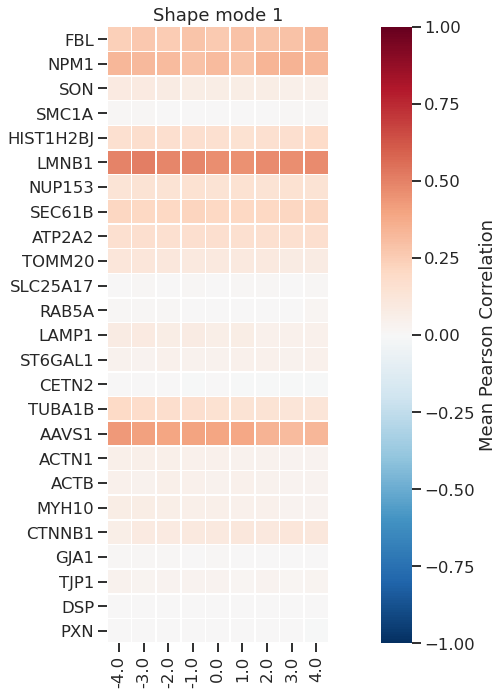

In [86]:

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

sns.set_context('talk', font_scale=1.0)

fig, ax = plt.subplots(figsize = (15, 10))
ax.set_title(f'Shape mode 1')



ax = sns.heatmap(
    df_pivot, 
    linewidths=.5, 
    cmap="RdBu_r", center=0, vmin=-1, vmax=1, square=True, cbar_kws={'label': "Mean Pearson Correlation"})


plt.xlabel("")
plt.ylabel("")
plt.tight_layout()


# fig.savefig(
#     f"./stereotypy_svgs/Mean_stereotypy_shapemode1_bin_0_ranked.svg", format="svg", dpi=300, transparent=False,
# )

# Specific structure lineplots

In [272]:
df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC1_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC2_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC3_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC4_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC5_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC6_9bins.csv")
#df_final = pd.read_csv("/allen/aics/modeling/ritvik/projects/pytorch_integrated_cell/examples/paper_plos_2020/FINALseg_morphed_PC7_9bins.csv")
df_final

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
0,0,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,475814.0,481508.0,0.367609,0.29,0
1,1,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,473689.0,469644.0,0.477379,0.29,1
2,2,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,482482.0,482582.0,0.448885,0.29,2
3,3,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,477553.0,469129.0,0.488608,0.29,3
4,4,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,1.0,1.0,500961.0,501663.0,0.375519,0.29,4
...,...,...,...,...,...,...,...,...,...,...,...,...
90760,46,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,256390.0,252460.0,0.000000,74.24,46
90761,47,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,242819.0,884099.0,0.000000,74.24,47
90762,48,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,878432.0,234177.0,0.000000,74.24,48
90763,49,TUBA1B,TUBA1B,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,9.0,9.0,235437.0,879497.0,0.000000,74.24,49


In [273]:
inc_res = [  0.29,  0.58,  1.16,  2.32,  4.64,  9.28, 18.56, 37.12]
Morph_res = [0.11, 0.22, 0.43, 0.86, 1.73, 3.46, 6.91, 13.82]
mapping = {i:j for i, j in zip(inc_res, Morph_res)}


df_final.replace({"Resolution (micrometers)": mapping}, inplace=True)

old_bin = [  1., 2., 3., 4., 5., 6., 7., 8., 9.]
new_bin = [-4,-3,-2,-1,0,1,2,3,4]
mapping = {i:j for i, j in zip(old_bin, new_bin)}


df_final.replace({"bin_1": mapping}, inplace=True)
df_final.replace({"bin_2": mapping}, inplace=True)


groups = ["FBL", "NPM1", "HIST1H2BJ","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

df_order = pd.DataFrame()

for g in groups:
    try:
        gr = test.groupby(['structure_name_1']).get_group(g)
        df_order = df_order.append(gr)
    except:
        print(g)
test = df_final.loc[df_final['structure_name_1'] == df_final['structure_name_2']]

groups = ["FBL", "NPM1", "HIST1H2BJ","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

#groups = ["FBL", "NPM1", "H2B", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","ACTB","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

# groups = ["FBL", "NPM1", "H2B","SON", "SMC1A", "LMNB1" , "NUP153" , "SEC61B", "ATP2A2" , "TOMM20", "RAB5A", "LAMP1", "ST6GAL1", "TUBA1B", "AAVS1","ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP","CETN2", "PXN"]

colors = 5 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 8 * ['r'] + 2 * ['y'] 
#colors = 5 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 7 * ['r'] + 2 * ['y'] 
#colors = 3 * ['b'] + 2 * ['g'] + 7 * ['orange'] + 8 * ['r'] + 2 * ['y'] 
# markers = 12 * ["x"] + 12 * ["o"] + 2*[">"]
markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h", "v", "x"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "v", "x", "d", ">", "<"] + ["*", ","]
#markers = ["*", ",", "h"] + ["*", ","] + ["*", ",", "h", "v", "x", "d", ">"] + ["*", ",", "h", "v", "x", "d", ">", "<"] + ["*", ","]
linestyles= 24 * [":"]

color_dict = {i:j for i, j in zip(groups, colors)}

In [274]:
df_order

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
25758,0,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,727252.0,736929.0,0.117377,0.11,0
25759,1,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,794288.0,759914.0,0.140645,0.11,1
25760,2,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,711134.0,719609.0,0.213130,0.11,2
25761,3,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,736921.0,708384.0,0.154768,0.11,3
25762,4,FBL,FBL,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,-4.0,-4.0,736944.0,759912.0,0.366990,0.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
60475,3,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,965021.0,956479.0,0.105127,13.82,3
60476,0,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,958790.0,958594.0,0.000000,74.24,0
60477,1,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,958594.0,971064.0,0.000000,74.24,1
60478,2,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,4.0,4.0,965038.0,954586.0,0.000000,74.24,2


In [275]:
df_order = df_order.loc[df_order['bin_1'] == 0]

In [276]:

srructs = ['CTNNB1', 'CETN2', 'LMNB1']
structs = ['FBL', 'NPM1', 'SON', 'SMC1A', 'HIST1H2BJ']
structs = ['LMNB1', 'NUP153']
structs = ['SEC61B', "ATP2A2", "TOMM20", "PMP34", "RAB5A", "LAMP1", "ST6GAL1", "CETN2", "TUBA1B"]
structs = ['AAVS1', "ACTB", "ACTN1","MYH10", "CTNNB1", "GJA1", "TJP1", "DSP", "CETN2", "PXN"]
df_order = df_order[df_order['structure_name_1'].isin(structs)]


In [277]:
df_order

,Unnamed: 0,structure_name_1,structure_name_2,path_seg_morph_1,path_seg_morph_2,bin_1,bin_2,CellId_1,CellId_2,Pearson Correlation,Resolution (micrometers),samples
1503,0,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,615005.0,472925.0,0.303566,0.11,0
1504,1,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,501968.0,470231.0,0.400458,0.11,1
1505,2,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,471604.0,621051.0,0.369345,0.11,2
1506,3,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,619753.0,479928.0,0.421668,0.11,3
1507,4,AAVS1,AAVS1,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,620078.0,509685.0,0.439040,0.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
59611,43,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,959949.0,960573.0,0.000000,74.24,43
59612,44,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,965672.0,582862.0,0.000000,74.24,44
59613,45,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,971202.0,959166.0,0.000000,74.24,45
59614,46,PXN,PXN,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,/allen/aics/assay-dev/MicroscopyOtherData/Vian...,0.0,0.0,600518.0,596954.0,0.000000,74.24,46


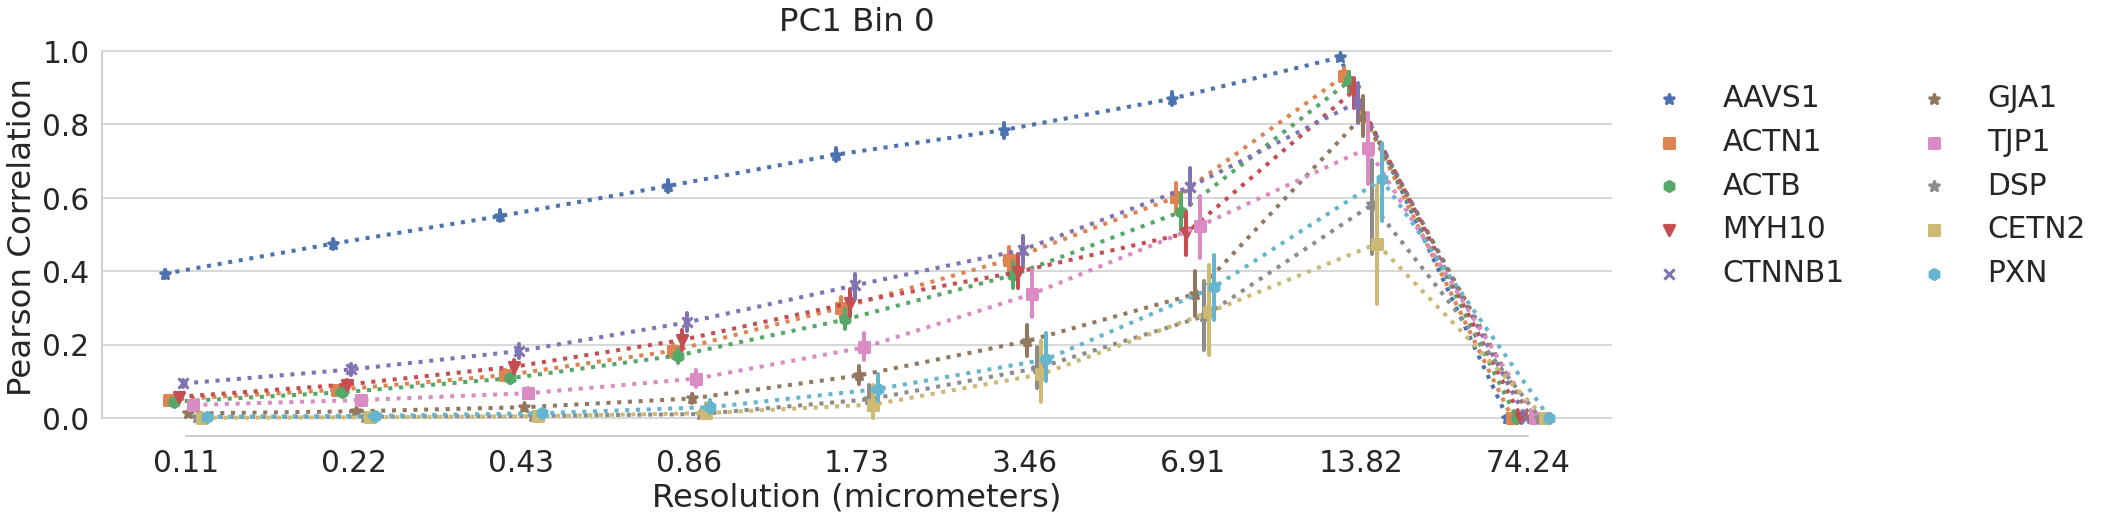

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", rc={"lines.linewidth": 1.2}, font_scale=2)

sns.set_style("whitegrid")
sns.set_context('talk', font_scale=1.8)

fig = plt.figure(figsize=(30, 8))

ax = sns.pointplot(
    x="Resolution (micrometers)",
    y="Pearson Correlation",
    hue="structure_name_1",
    data=df_order,
    ci=95,
    dodge = True,
#     capsize=0.2,
#     palette=color_dict,
    markers = markers,
    linestyles=linestyles,
)
# ax.legend(
#     loc="best", bbox_to_anchor=(0.95, 0.95), ncol=2, frameon=False,
# )


ax.legend(
    loc="best", bbox_to_anchor=(1, 0.95), ncol=2, frameon=False,
)
# ax.set_title(f"Bin {this_bin}")
ax.set_title(f"PC1 Bin 0")
sns.despine(
    offset=0, trim=True,
)

plt.tight_layout()

#save the plot
fig.savefig(
    f"./cluster4_stereotypy.png", format="png", dpi=300, transparent=False,
)
# fig.savefig(
#     f"./Stereotype_morphed_seg_PC1_res_6.91.png", format="png", dpi=300, transparent=False,
# )

## Sunburst plot for stereotypy